In [ ]:
### Explore the distribution and normalisation of the alphas

Explore the distribution of alphas and expected alphas
Distribution of alphas, including histograms
boxlots for each sample, each topic
Normalaisation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Not sure why python not looking in here but runs from anoconder command line in this enviroment
import sys
sys.path.append ('C:\Users\Fran\Anaconda2\envs\ipykernel_py2\Lib\site-packages')

import pylab as plt
import plotly.plotly as py
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

import os
import platform

#if platform.system().lower() == 'linux':
#    basedir = '/home/joewandy/git/multifile_lda'
#else:
basedir ='C:\Users\Fran\Documents\MScProject\workspace\MultiFile\multifile_lda'
sys.path.append(basedir)

from multifile_analysis import MultifileAnalysis
from multifile_viz import MultifileLDAViz
from multifile_lda import MultifileLDA
from topic_da import *
from lda_topicmodel import TopicModel

sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
analysis = MultifileAnalysis.resume_from('results/beer_urine.project')
print analysis.last_saved_timestamp, analysis.message

Project loaded from results/beer_urine.project time taken = 69.4628575842
Thu Jun 23 00:58:57 2016 testing example script on urine and beer data


(2700L,)


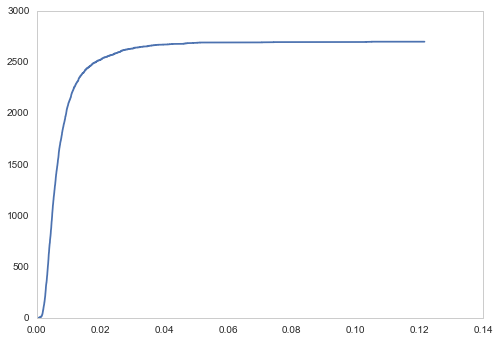

In [7]:
alphas = np.array(analysis.model.mean_alpha)
alphas_exp = np.divide(alphas, alphas.sum(axis = 1)[:,None])
sorted_data = np.sort(alphas.flatten())  # Or data.sort(), if data can be modified
print sorted_data.shape
# Cumulative distributions:
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
plt.show()

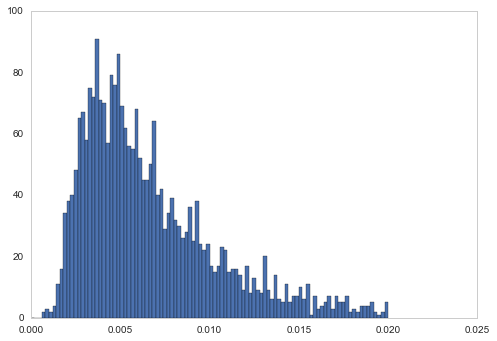

In [12]:
alphas = np.array(analysis.model.mean_alpha)

plt.hist(alphas.flatten(),bins = 100,range = (0,0.02))
plt.show()

#### Normalisation using expected alphas

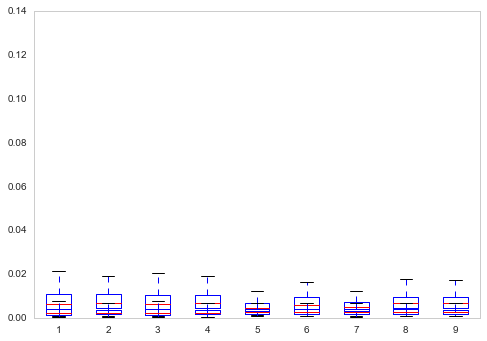

In [38]:
plt.boxplot(alphas.transpose())
plt.boxplot(alphas_exp.transpose())
plt.show()

In [43]:
print N

9


In [3]:
dict_file = '/Users/Fran/Dropbox/beer_analysis/large_study/Beer_mzXML_large_study/beer_v_urine.dict'

a = TopicModel(dict_file, model_type='nb')

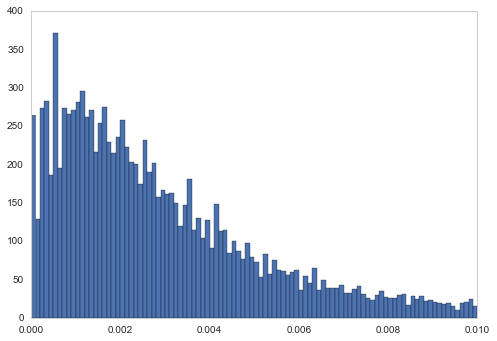

In [6]:
plt.hist(a.alphas.flatten(),bins = 100,range = (0,0.01))
plt.show()

In [4]:
sampleID = a.sampleIDs
alphas = a.alphas
N=  (alphas.shape[0])
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': alphas[i,:], 
    'name':sampleID[i],
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(N)]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'title': 'Mean alphas ',
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)

In [53]:
sampleID = ['Beer_1', 'Beer_2','Beer_3','Beer_4', 'Urine_37', 'Urine_44', 'Urine_64',
           'Urine_73', 'Urine_74']
N=  (alphas.shape[0])
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': alphas[i,:], 
    'name':sampleID[i],
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(N)]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'title': 'Mean alphas ',
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)

In [50]:
sampleID = ['Beer_1', 'Beer_2','Beer_3','Beer_4', 'Urine_37', 'Urine_44', 'Urine_64',
           'Urine_73', 'Urine_74']
N=  (alphas.shape[0])
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': alphas_exp[i,:], 
    'name':sampleID[i],
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(N)]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)

(2700L,)


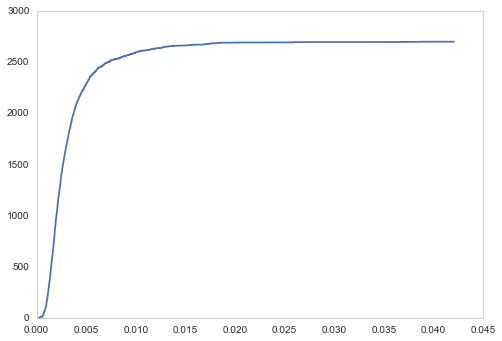

In [8]:
alphas_exp = np.divide(alphas, alphas.sum(axis = 1)[:,None])
sorted_data = np.sort(alphas_exp.flatten())  # Or data.sort(), if data can be modified
print sorted_data.shape
# Cumulative distributions:
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
plt.show()

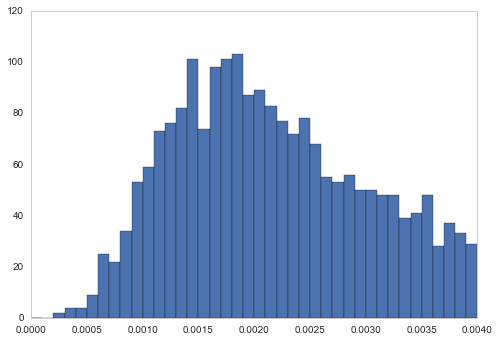

In [14]:


plt.hist(alphas_exp.flatten(),bins = 40 ,range = (0,0.004))
plt.show()

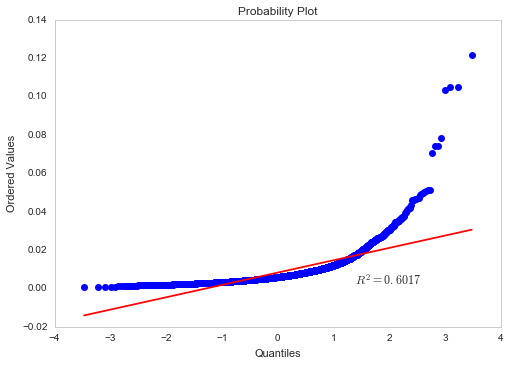

In [15]:
from scipy import stats
res = stats.probplot(alphas.flatten(), plot=plt)
plt.show()

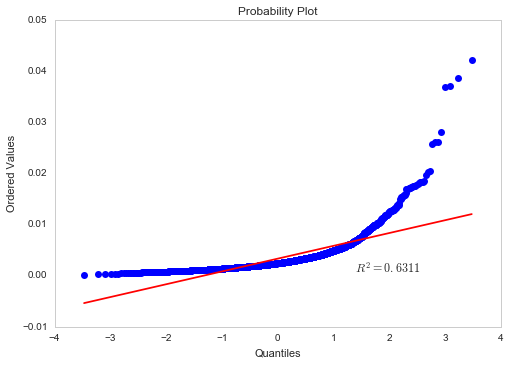

In [23]:
from scipy import stats
res = stats.probplot(alphas_exp.flatten(), plot=plt)
plt.show()

(2700L,)


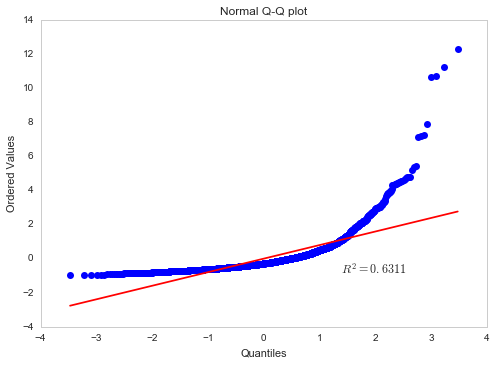

In [37]:
obs= alphas_exp.flatten()
z = (obs-np.mean(obs))/np.std(obs)
print z.shape


stats.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()